<a href="https://colab.research.google.com/github/drawcodeboy/first_ML_DL/blob/main/firstMLDL_08_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN의 시각화

>* 훈련된 합성곱층의 가중치 분포 확인
>* 필터의 가중치 시각화
>* functional API를 이용한 모델 생성
>* functional API가 왜 필요한가? (부분적인 모델)
>* Feature Map 시각화, 필터를 통해 어느 부분이 제일 활성화 되었는가 눈으로 확인 할 수 있었다.

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 #CNN을 위해 reshape
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 70s 45ms/step - loss: 0.5181 - accuracy: 0.8160 - val_loss: 0.3266 - val_accuracy: 0.8837
Epoch 2/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.3436 - accuracy: 0.8771 - val_loss: 0.2886 - val_accuracy: 0.8907
Epoch 3/20
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2951 - accuracy: 0.8942 - val_loss: 0.2479 - val_accuracy: 0.9064
Epoch 4/20
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2621 - accuracy: 0.9045 - val_loss: 0.2437 - val_accuracy: 0.9087
Epoch 5/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.2363 - accuracy: 0.9133 - val_loss: 0.2279 - val_accuracy: 0.9154
Epoch 6/20
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2148 - accuracy: 0.9210 - val_loss: 0.2273 - val_accuracy: 0.9163
Epoch 7/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.2031 - accuracy: 0.9254 - val_loss: 0.2283 -

In [3]:
model = keras.models.load_model('best-cnn-model.h5')

In [4]:
"""
keras.layer 속성을 통해 어떤 층이 있는 지 알 수 있음
"""
model.layers
print(model.layers)

[<keras.layers.convolutional.Conv2D object at 0x7f882928b150>, <keras.layers.pooling.MaxPooling2D object at 0x7f8831d5ea50>, <keras.layers.convolutional.Conv2D object at 0x7f8831d74210>, <keras.layers.pooling.MaxPooling2D object at 0x7f882db5c610>, <keras.layers.core.flatten.Flatten object at 0x7f8829245e10>, <keras.layers.core.dense.Dense object at 0x7f882926ecd0>, <keras.layers.core.dropout.Dropout object at 0x7f882db5c690>, <keras.layers.core.dense.Dense object at 0x7f8832b4f790>]


In [5]:
# 모델의 첫번째 원소 -> 첫번째 Layer 층의 weight에 대한 정보
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [6]:
# tensor 클래스의 객체를 numpy로 바꾸어 다루기 쉽게 함

conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.030305061 0.25855651


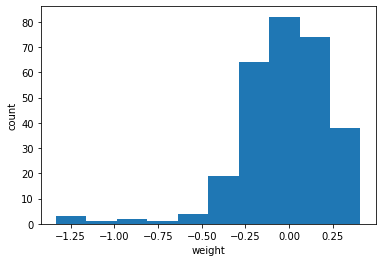

In [7]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

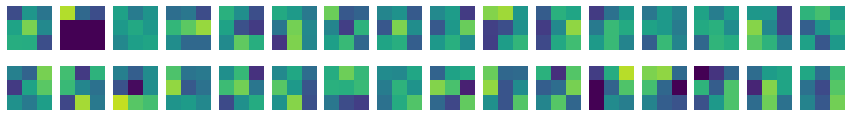

In [9]:
"""
    32개의 필터 가중치를 시각화하여 확인해보자.
    subplot을 통해 32개의 이미지를 출력할 수 있게 만들어주고,
    conv_weights에서 인덱싱을 아래와 같이 한 이유는
    커널의 크기가 (3, 3)이고, 필터의 depth가 1이기 때문에
    0번째 값을 선택하고, 나머지 필터 32개의 인덱싱을 for문을 돌면서
    imshow를 통해 담는다. 
"""

fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0, i * 16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [11]:
"""
    훈련되지 않은 합성곱 신경망과 시각화 자료를 비교해보자.
"""
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation = 'relu', 
                                          padding='same', input_shape=(28,28,1)))

In [12]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [13]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())
"""
    평균은 비슷하지만 표준편차가 더 작게 나온다.
    표준편차가 작다는 것은 가중치의 분포가 어디에 몰려있지 않고,
    균등하게 배포된 것과 비슷한 형태를 띈 것이라 해석할 수 있다.
"""

-0.00084549724 0.08509006


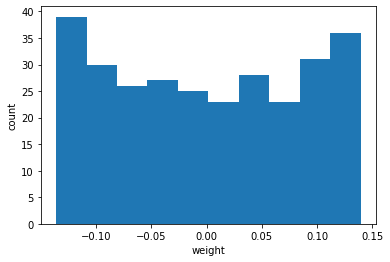

In [14]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

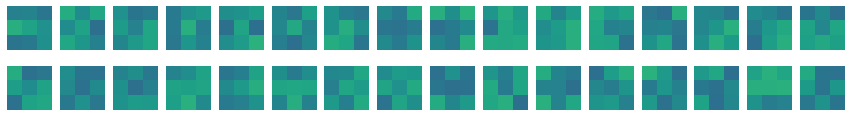

In [16]:
# 똑같이 32개의 필터 시각화 해보기

fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

"""
    훈련된 32개의 필터와 달리 훈련되지 않은 32개의 필터는 꽤 밋밋해보인다.
    tensorflow가 신경망의 가중치를 처은 초기화할 때 균등 분포에서 랜덤하게
    값을 선택하여 이러한 상태이다.

    훈련되 32개의 필터는 패션 MNIST 데이터 셋의 분류 정확도를 높이기 위해
    유용한 패턴을 학습했다는 사실을 알 수 있다.
"""

In [17]:
"""
    함수형 API를 이용하여 Feature Map 시각화
"""

print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [18]:
# model.input을 통해 input을 가져오기
# model.layers[0].output, 첫번째층(conv2D)를 가져옴으로써 output 지정
conv_acti = keras.Model(model.input, model.layers[0].output)

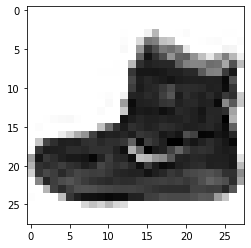

In [19]:
(train_X, train_Y), (test_X, test_Y) =\
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_X[0], cmap='gray_r')
plt.show()

In [20]:
# Feature Map 시각화
# Sample 하나를 Feature Map을 시각화 하기 위해
# 전처리

inputs = train_X[0:1].reshape(-1, 28, 28, 1) / 255.0 # normalization
feature_maps = conv_acti.predict(inputs)

In [21]:
print(feature_maps.shape) # 32개의 필터를 활용한 feature map

(1, 28, 28, 32)


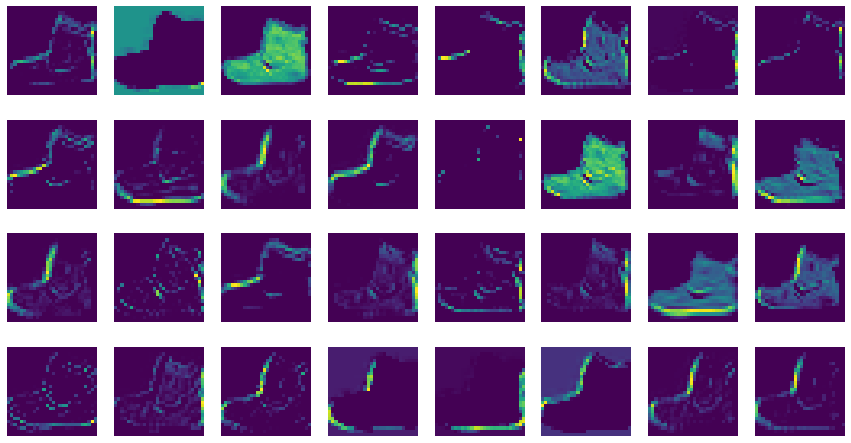

In [23]:
# 32개의 필터를 통해 처리된 이미지

fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')
plt.show()

In [25]:
# 두번째 합성곱층 feature map 시각화

conv2_acti = keras.Model(model.input, model.layers[2].output) # 풀링 층 중간에 껴있어서 3번째

In [28]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

In [29]:
print(feature_maps.shape)

(1, 14, 14, 64)


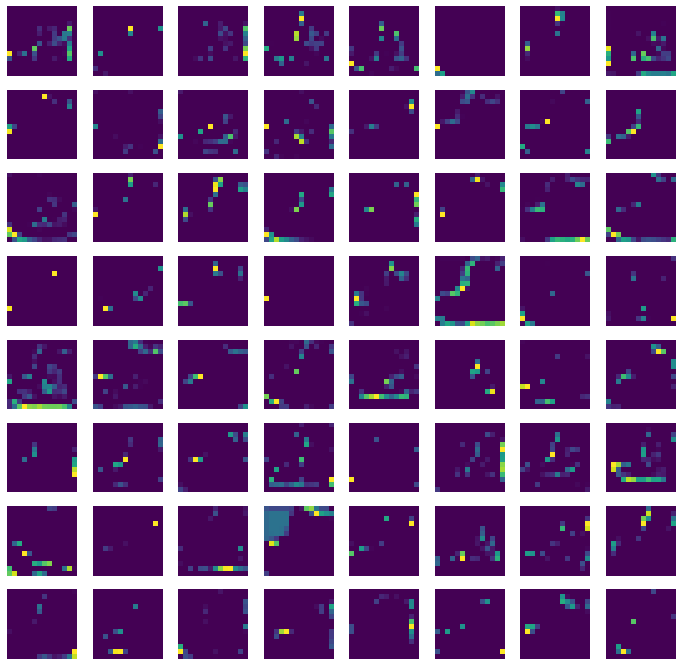

In [30]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i * 8 + j])
        axs[i, j].axis('off')
plt.show()